In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

# data set content 🤔


In [6]:
df=pd.read_csv("../DataSet/Agrofood_co2_emission.csv")

In [7]:
df.head()

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


In [8]:
df.tail()

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
6960,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.0,251.1465,76500.2982,...,282.5994,0.0,0.0,417.3150,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250
6961,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.0,255.7975,76500.2982,...,255.5900,0.0,0.0,398.1644,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500
6962,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.0,327.0897,76500.2982,...,257.2735,0.0,0.0,465.7735,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
6963,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.0,290.1893,76500.2982,...,267.5224,0.0,0.0,444.2335,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667
6964,Zimbabwe,2020,481.9027,48.4197,108.3022,7.9733,0.0,73.0,238.7639,76500.2982,...,266.7316,0.0,0.0,444.2335,11980005.0,5700460.0,7385220.0,8284447.0,96505.221853,0.189000


In [9]:
df['Total_Population'] = df['Total Population - Male'] + df['Total Population - Female']

In [10]:
df.drop(columns=["Total Population - Female","Total Population - Male"],inplace=True)
df

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,total_emission,Average Temperature °C,Total_Population
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.0000,0.0,11.807483,63.1152,-2388.8030,...,1590.5319,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,2198.963539,0.536167,10694796.0
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.1600,0.0,11.712073,61.2125,-2388.8030,...,1657.2364,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,2323.876629,0.020667,10745167.0
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.0000,0.0,11.712073,53.3170,-2388.8030,...,1653.5068,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,2356.304229,-0.259583,12057433.0
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.0000,0.0,11.712073,54.3617,-2388.8030,...,1642.9623,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,2368.470529,0.101917,14003760.0
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.6000,0.0,11.712073,53.9874,-2388.8030,...,1689.3593,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,2500.768729,0.372250,15455554.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.000000,251.1465,76500.2982,...,2721.1459,282.5994,0.0,0.0,417.3150,10934468.0,5215894.0,98491.026347,1.120250,14452705.0
6961,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.000000,255.7975,76500.2982,...,2744.8763,255.5900,0.0,0.0,398.1644,11201138.0,5328766.0,97159.311553,0.046500,14751102.0
6962,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.000000,327.0897,76500.2982,...,2790.0949,257.2735,0.0,0.0,465.7735,11465748.0,5447513.0,97668.308205,0.516333,15052183.0
6963,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.000000,290.1893,76500.2982,...,2828.7215,267.5224,0.0,0.0,444.2335,11725970.0,5571525.0,98988.062799,0.985667,15354607.0


In [11]:
target_col = df['Average Temperature °C']  
df = df.drop(columns=['Average Temperature °C'])
df['Average Temperature °C'] = target_col


In [12]:
print(df.head())

          Area  Year  Savanna fires  Forest fires  Crop Residues  \
0  Afghanistan  1990        14.7237        0.0557       205.6077   
1  Afghanistan  1991        14.7237        0.0557       209.4971   
2  Afghanistan  1992        14.7237        0.0557       196.5341   
3  Afghanistan  1993        14.7237        0.0557       230.8175   
4  Afghanistan  1994        14.7237        0.0557       242.0494   

   Rice Cultivation  Drained organic soils (CO2)  Pesticides Manufacturing  \
0            686.00                          0.0                 11.807483   
1            678.16                          0.0                 11.712073   
2            686.00                          0.0                 11.712073   
3            686.00                          0.0                 11.712073   
4            705.60                          0.0                 11.712073   

   Food Transport  Forestland  ...  Manure left on Pasture  Manure Management  \
0         63.1152   -2388.803  ...       

# sanity check of data

In [13]:
df.shape

(6965, 30)

In [14]:
df.info()

#area->object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna fires                    6934 non-null   float64
 3   Forest fires                     6872 non-null   float64
 4   Crop Residues                    5576 non-null   float64
 5   Rice Cultivation                 6965 non-null   float64
 6   Drained organic soils (CO2)      6965 non-null   float64
 7   Pesticides Manufacturing         6965 non-null   float64
 8   Food Transport                   6965 non-null   float64
 9   Forestland                       6472 non-null   float64
 10  Net Forest conversion            6472 non-null   float64
 11  Food Household Consumption       6492 non-null   float64
 12  Food Retail         

In [15]:
df['Area'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belgium-Luxembourg', 'Belize', 'Benin', 'Bermuda',
       'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Channel Islands', 'Chile', 'China', 'China, Hong Kong SAR',
       'China, Macao SAR', 'China, mainland', 'China, Taiwan Province of',
       'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica',
       'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Czechoslovakia',
       "Democratic People's Republic of Korea",
       'Democratic 

In [16]:
df.isna().sum()

Area                                  0
Year                                  0
Savanna fires                        31
Forest fires                         93
Crop Residues                      1389
Rice Cultivation                      0
Drained organic soils (CO2)           0
Pesticides Manufacturing              0
Food Transport                        0
Forestland                          493
Net Forest conversion               493
Food Household Consumption          473
Food Retail                           0
On-farm Electricity Use               0
Food Packaging                        0
Agrifood Systems Waste Disposal       0
Food Processing                       0
Fertilizers Manufacturing             0
IPPU                                743
Manure applied to Soils             928
Manure left on Pasture                0
Manure Management                   928
Fires in organic soils                0
Fires in humid tropical forests     155
On-farm energy use                  956


### 🧹 Data Preprocessing
- Handled missing values using mean imputation.
- Encoded categorical features using One-Hot Encoding.
- Applied MinMaxScaler to normalize features.


In [17]:
print(df.columns[df.isna().sum() > 0])


Index(['Savanna fires', 'Forest fires', 'Crop Residues', 'Forestland',
       'Net Forest conversion', 'Food Household Consumption', 'IPPU',
       'Manure applied to Soils', 'Manure Management',
       'Fires in humid tropical forests', 'On-farm energy use'],
      dtype='object')


In [18]:
df.isna().sum()/df.shape[0]*100
#percentage of missing values

Area                                0.000000
Year                                0.000000
Savanna fires                       0.445083
Forest fires                        1.335248
Crop Residues                      19.942570
Rice Cultivation                    0.000000
Drained organic soils (CO2)         0.000000
Pesticides Manufacturing            0.000000
Food Transport                      0.000000
Forestland                          7.078248
Net Forest conversion               7.078248
Food Household Consumption          6.791098
Food Retail                         0.000000
On-farm Electricity Use             0.000000
Food Packaging                      0.000000
Agrifood Systems Waste Disposal     0.000000
Food Processing                     0.000000
Fertilizers Manufacturing           0.000000
IPPU                               10.667624
Manure applied to Soils            13.323762
Manure left on Pasture              0.000000
Manure Management                  13.323762
Fires in o

In [19]:
df.duplicated().sum()

0

# eda

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,6965.0,2.005125e+03,8.894665e+00,1990.000000,1997.000000,2.005000e+03,2.013000e+03,2.020000e+03
Savanna fires,6934.0,1.188391e+03,5.246288e+03,0.000000,0.000000,1.651850e+00,1.110814e+02,1.146164e+05
Forest fires,6872.0,9.193022e+02,3.720079e+03,0.000000,0.000000,5.179000e-01,6.495077e+01,5.222763e+04
Crop Residues,5576.0,9.987063e+02,3.700345e+03,0.000200,11.006525,1.036982e+02,3.776410e+02,3.349007e+04
Rice Cultivation,6965.0,4.259667e+03,1.761383e+04,0.000000,181.260800,5.348174e+02,1.536640e+03,1.649153e+05
Drained organic soils (CO2),6965.0,3.503229e+03,1.586145e+04,0.000000,0.000000,0.000000e+00,6.904088e+02,2.410251e+05
Pesticides Manufacturing,6965.0,3.334184e+02,1.429159e+03,0.000000,6.000000,1.300000e+01,1.163255e+02,1.645900e+04
Food Transport,6965.0,1.939582e+03,5.616749e+03,0.000100,27.958600,2.049628e+02,1.207001e+03,6.794576e+04
Forestland,6472.0,-1.782829e+04,8.183221e+04,-797183.079000,-2848.350000,-6.292000e+01,0.000000e+00,1.711211e+05
Net Forest conversion,6472.0,1.760564e+04,1.011575e+05,0.000000,0.000000,4.444000e+01,4.701746e+03,1.605106e+06


In [21]:
df.describe(include="object")

,Area
count,6965
unique,236
top,Afghanistan
freq,31


<Axes: >

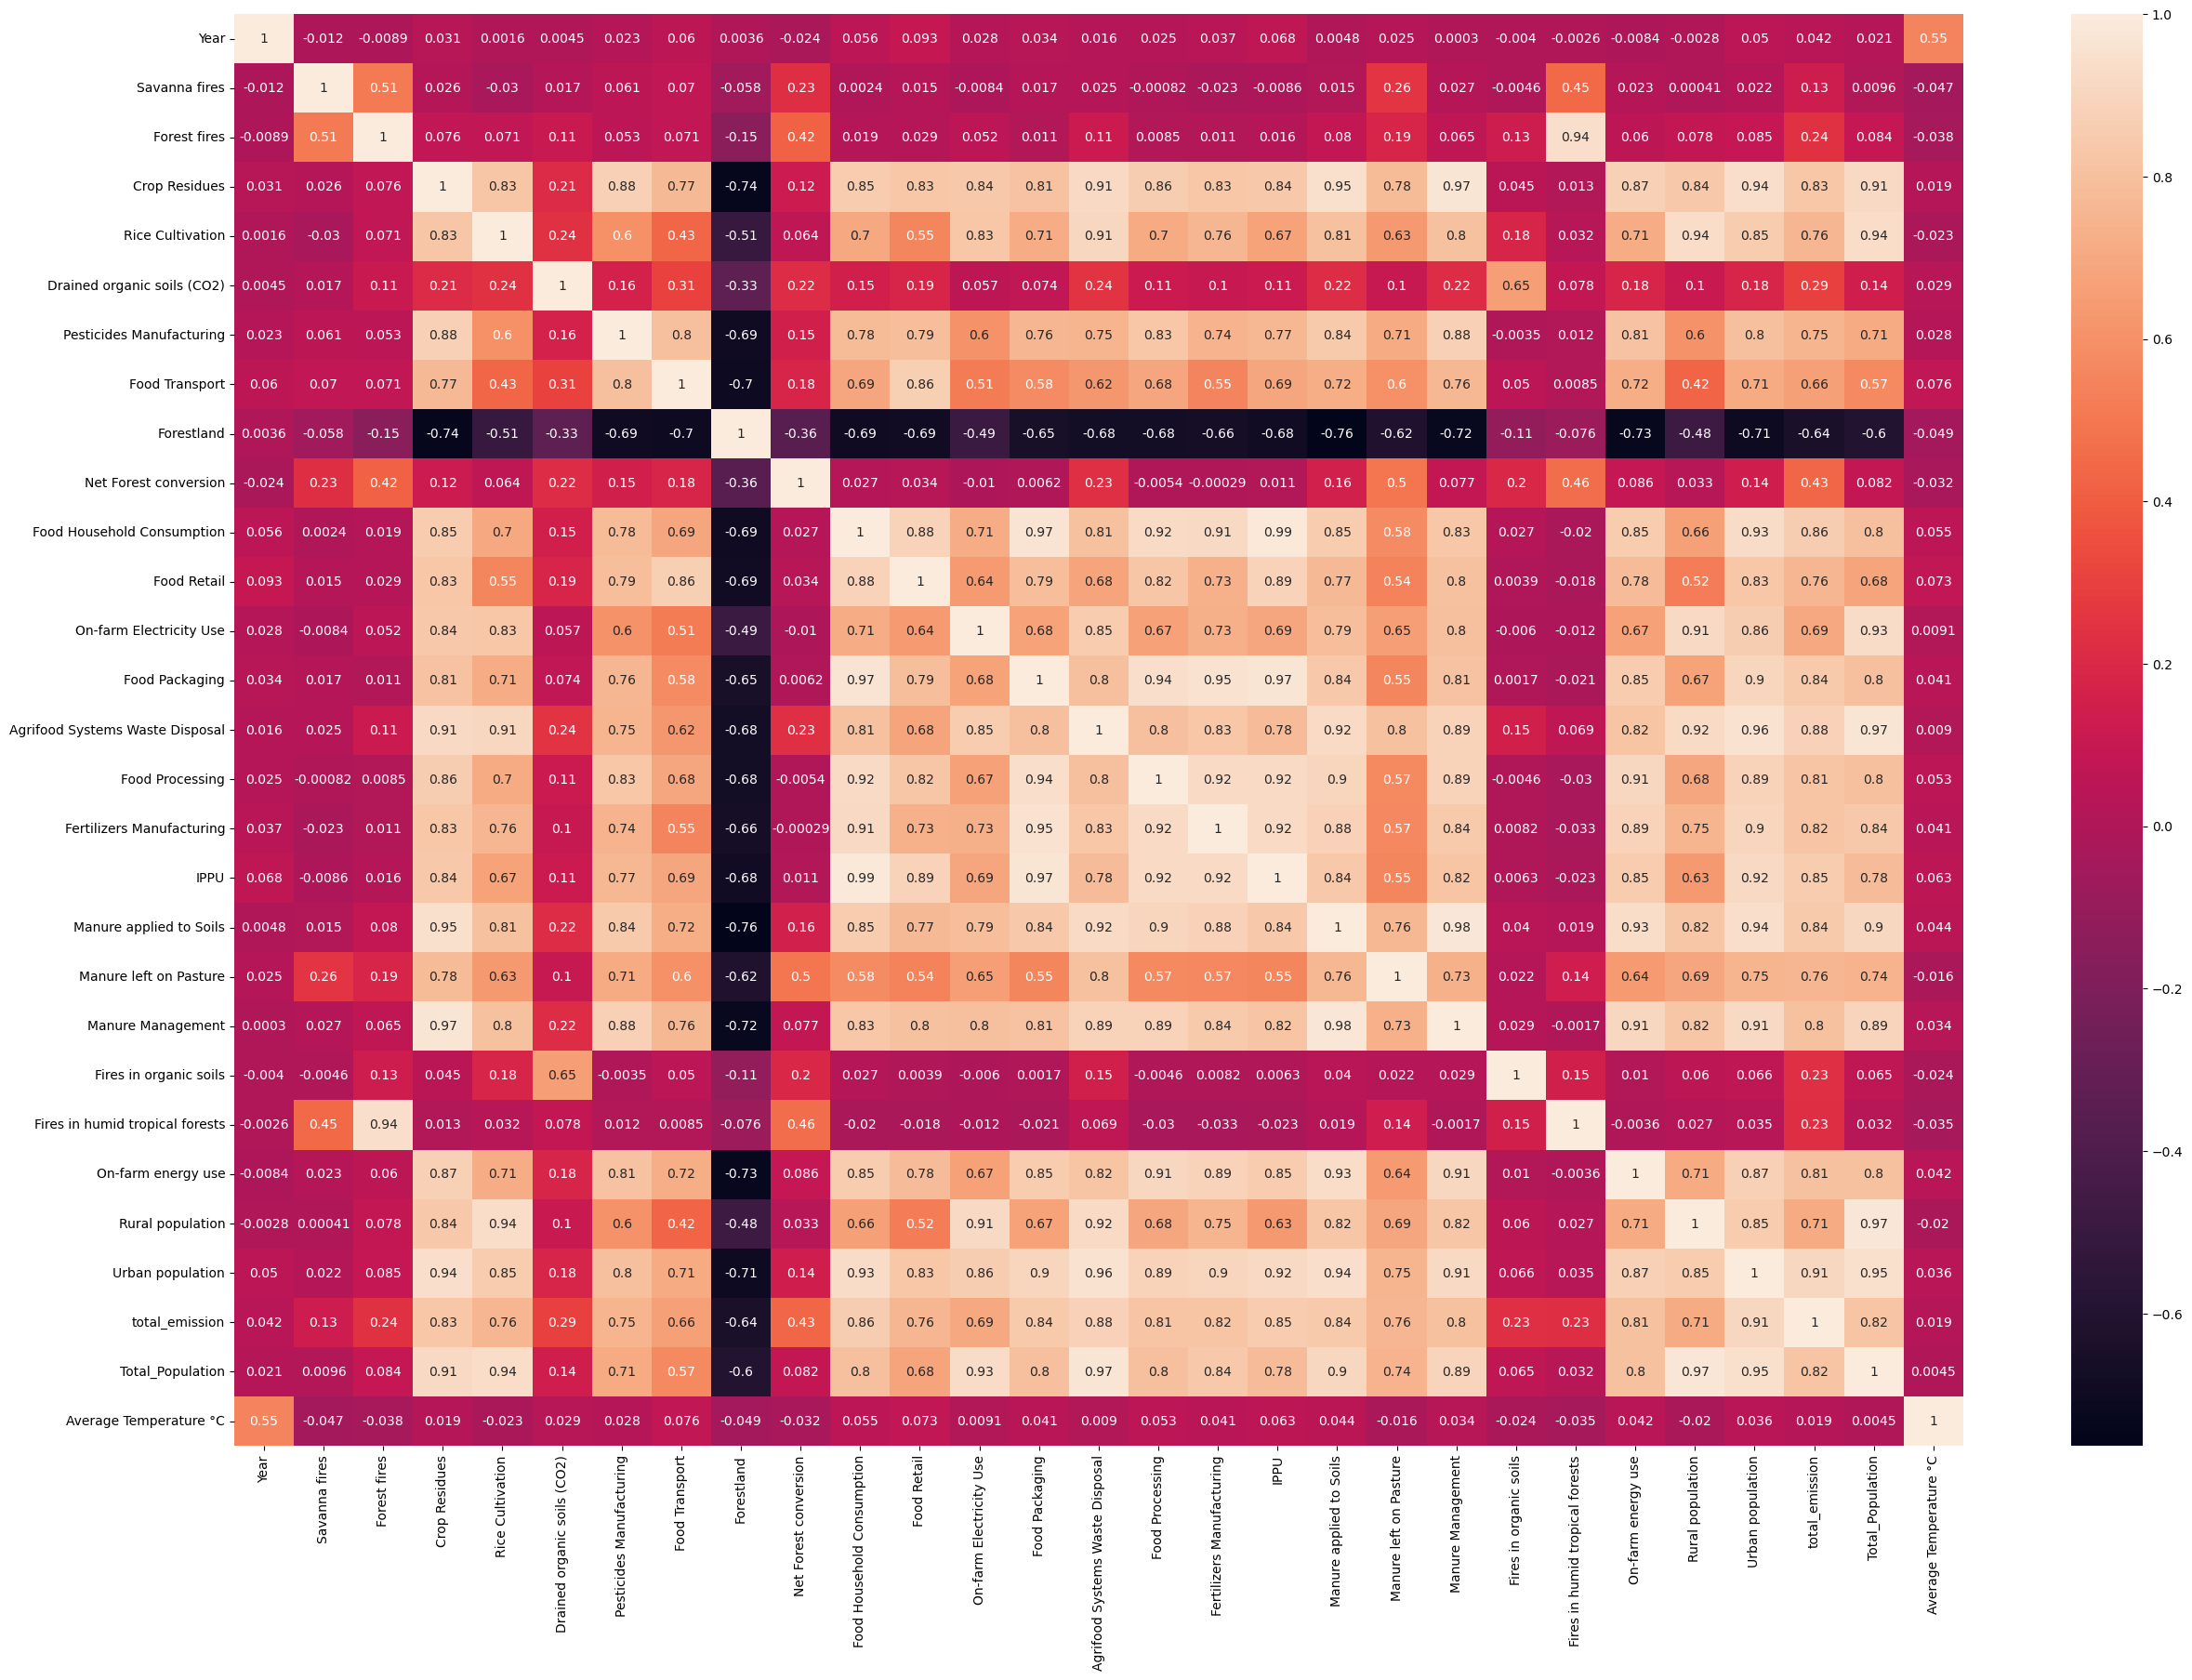

In [22]:
#correlation with heatmap
plt.figure(figsize=(30, 20))
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True)

# missing vaLue treatments

In [23]:
print(df.columns[df.isna().sum() > 0])


Index(['Savanna fires', 'Forest fires', 'Crop Residues', 'Forestland',
       'Net Forest conversion', 'Food Household Consumption', 'IPPU',
       'Manure applied to Soils', 'Manure Management',
       'Fires in humid tropical forests', 'On-farm energy use'],
      dtype='object')


In [24]:
from sklearn.impute import KNNImputer
impute=KNNImputer()

In [25]:
for i in ['Savanna fires', 'Forest fires', 'Crop Residues', 'Forestland',
       'Net Forest conversion', 'Food Household Consumption', 'IPPU',
       'Manure applied to Soils', 'Manure Management',
       'Fires in humid tropical forests', 'On-farm energy use']:
    df[i]=impute.fit_transform((df[[i]]))

In [26]:
df.isna().sum()

Area                               0
Year                               0
Savanna fires                      0
Forest fires                       0
Crop Residues                      0
Rice Cultivation                   0
Drained organic soils (CO2)        0
Pesticides Manufacturing           0
Food Transport                     0
Forestland                         0
Net Forest conversion              0
Food Household Consumption         0
Food Retail                        0
On-farm Electricity Use            0
Food Packaging                     0
Agrifood Systems Waste Disposal    0
Food Processing                    0
Fertilizers Manufacturing          0
IPPU                               0
Manure applied to Soils            0
Manure left on Pasture             0
Manure Management                  0
Fires in organic soils             0
Fires in humid tropical forests    0
On-farm energy use                 0
Rural population                   0
Urban population                   0
t

In [27]:
# save cleaned data set 

In [28]:
cleaned_data_path = "../DataSet/cleaned_data.csv"
df.to_csv(cleaned_data_path, index=False)

# data encoding

In [29]:
'''from category_encoders import HashingEncoder

encoder = HashingEncoder(cols="Area")
df_encoded=encoder.fit_transform(df)'''

'from category_encoders import HashingEncoder\n\nencoder = HashingEncoder(cols="Area")\ndf_encoded=encoder.fit_transform(df)'

In [30]:
#print(df_encoded.head())

In [31]:
#df_encoded

In [32]:
'''#boxplot to identify outliers

import warnings
warnings.filterwarnings("ignore")

for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df,x=i)
    plt.show()'''

'#boxplot to identify outliers\n\nimport warnings\nwarnings.filterwarnings("ignore")\n\nfor i in df.select_dtypes(include="number").columns:\n    sns.boxplot(data=df,x=i)\n    plt.show()'

In [33]:
df.shape

(6965, 30)

In [34]:
'''numeric_cols = df.select_dtypes(include=['number']).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = (df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))

    print(f"Outliers in column {col}: {outliers.sum()}")

    df = df[~outliers]  # Drop the rows with outliers'''

'numeric_cols = df.select_dtypes(include=[\'number\']).columns\n\nfor col in numeric_cols:\n    Q1 = df[col].quantile(0.25)\n    Q3 = df[col].quantile(0.75)\n    IQR = Q3 - Q1\n    outliers = (df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))\n\n    print(f"Outliers in column {col}: {outliers.sum()}")\n\n    df = df[~outliers]  # Drop the rows with outliers'

In [35]:
df.shape

(6965, 30)

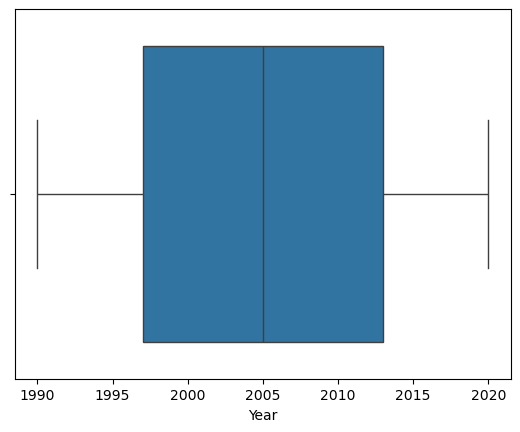

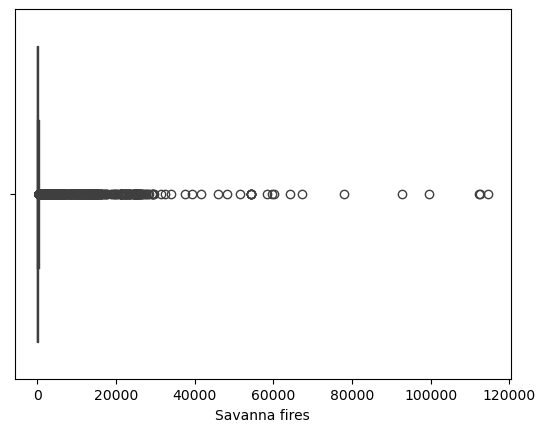

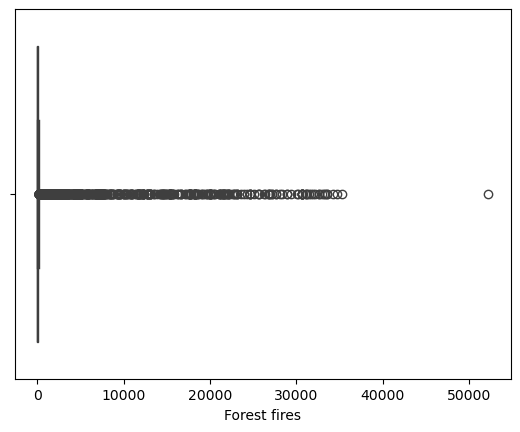

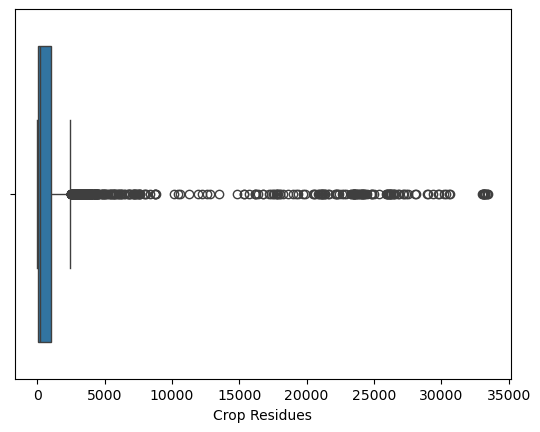

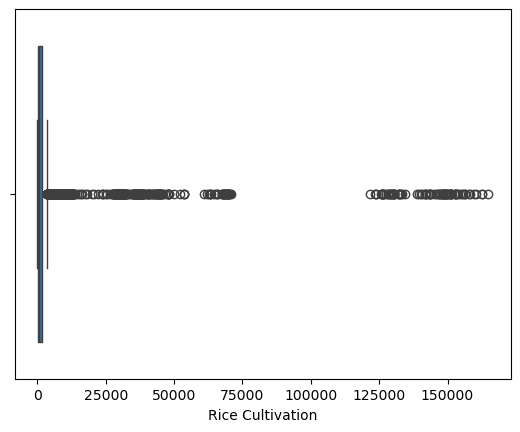

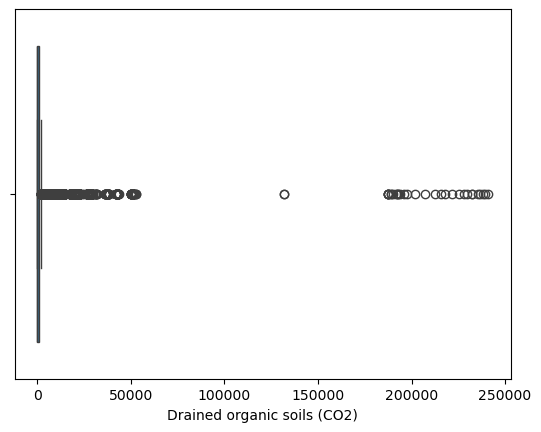

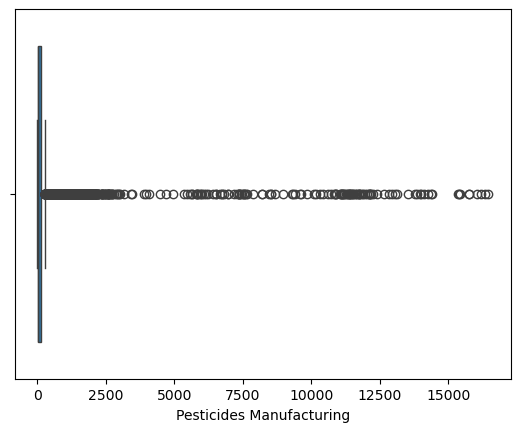

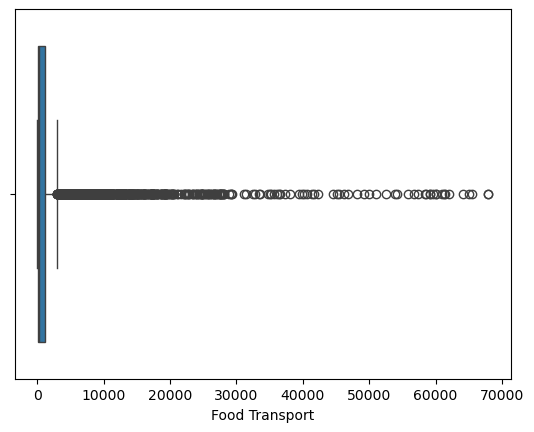

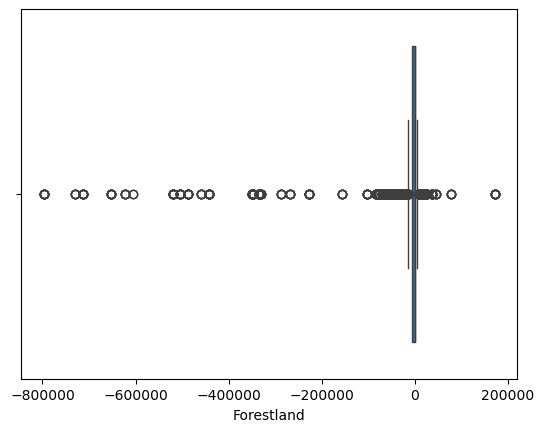

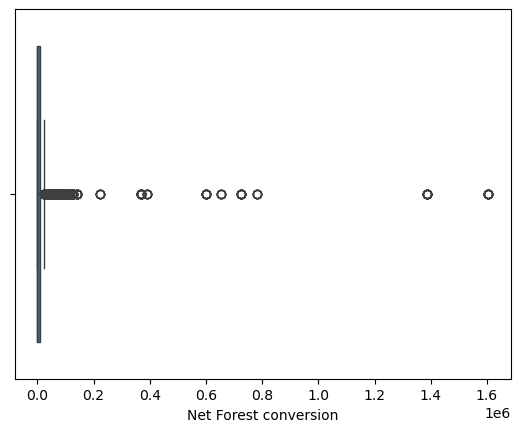

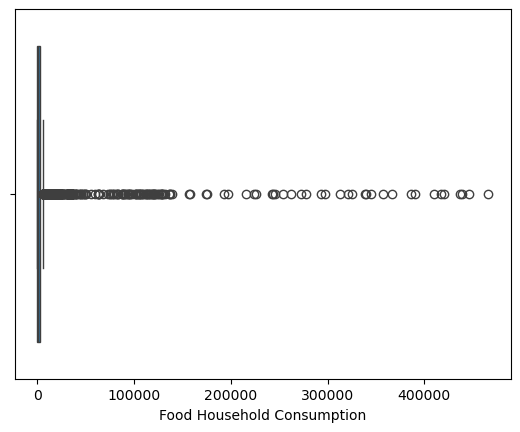

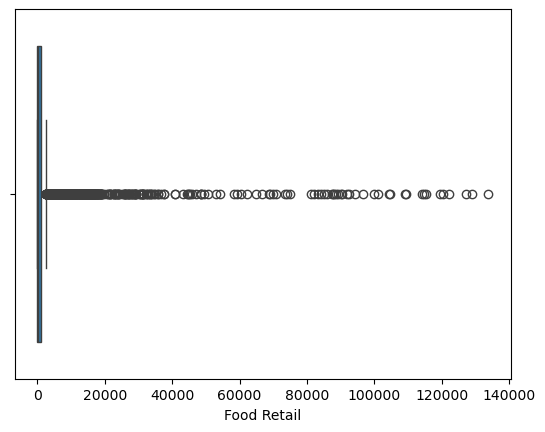

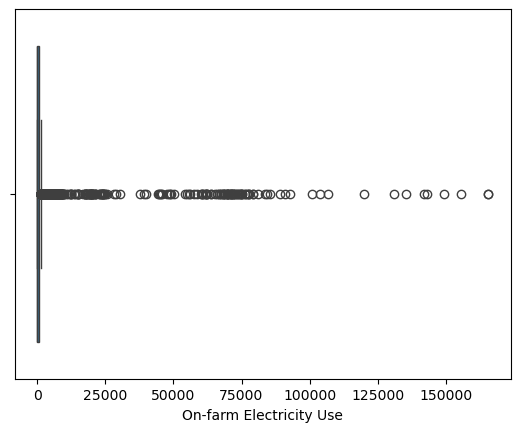

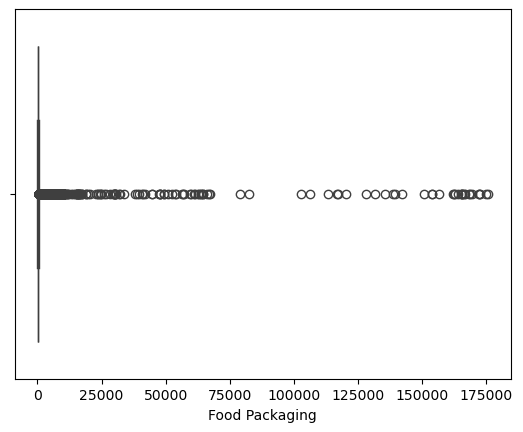

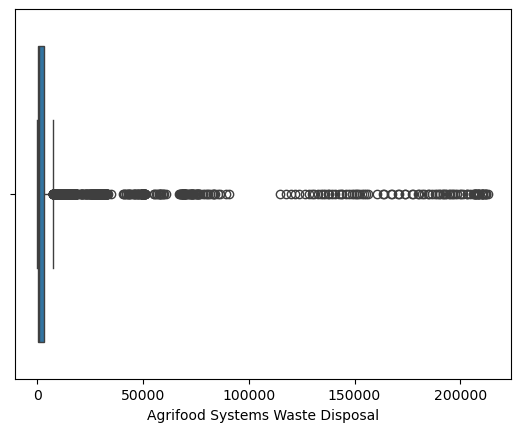

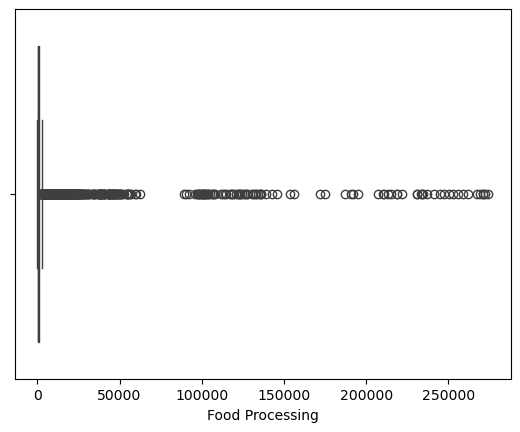

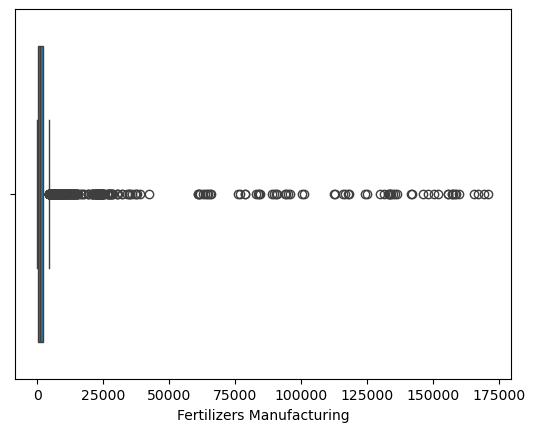

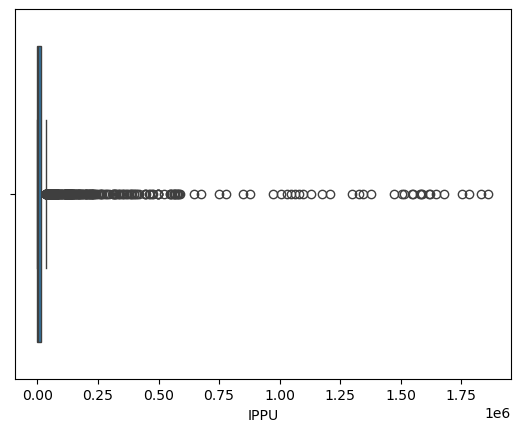

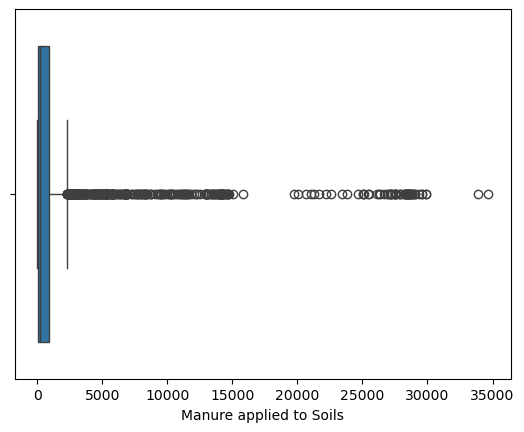

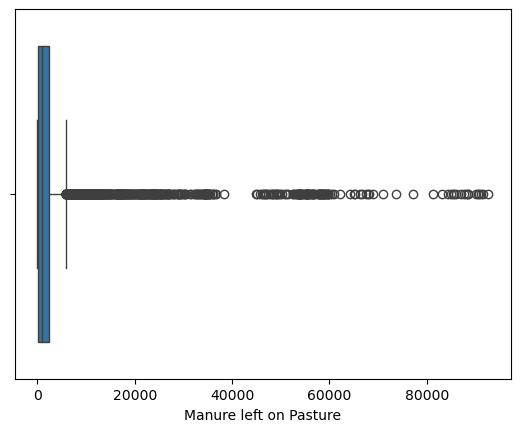

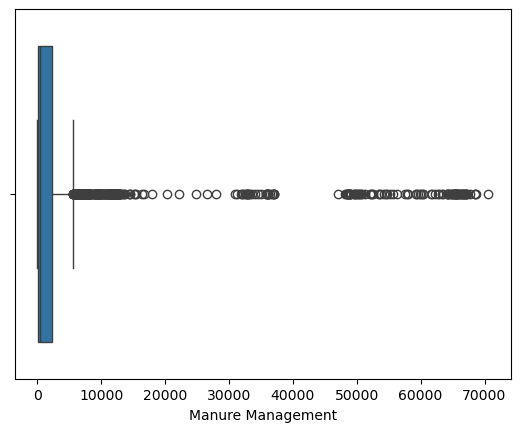

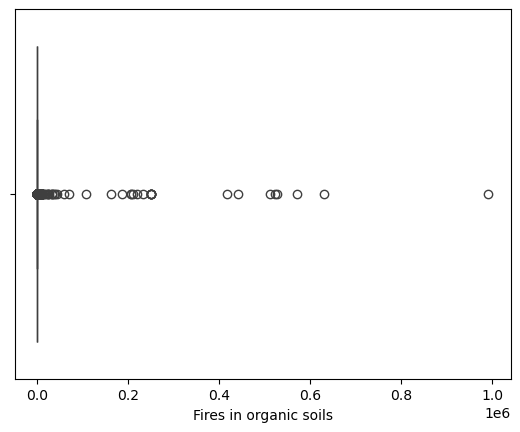

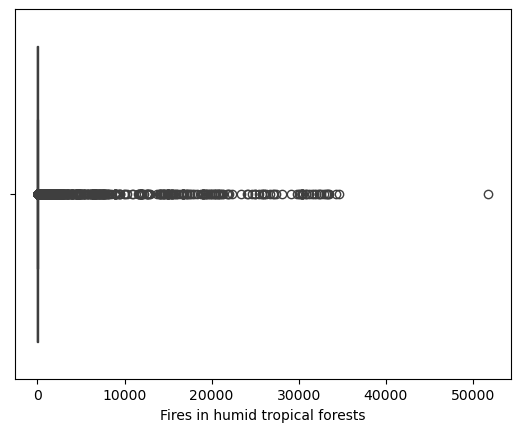

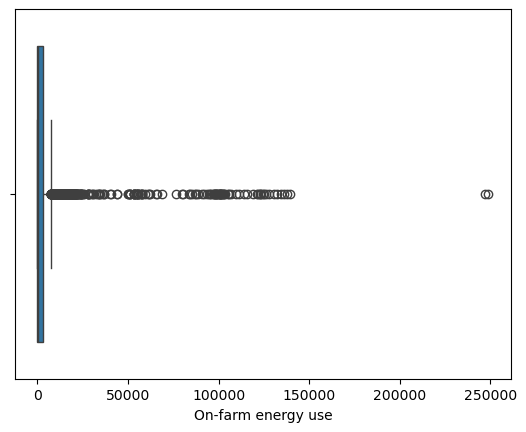

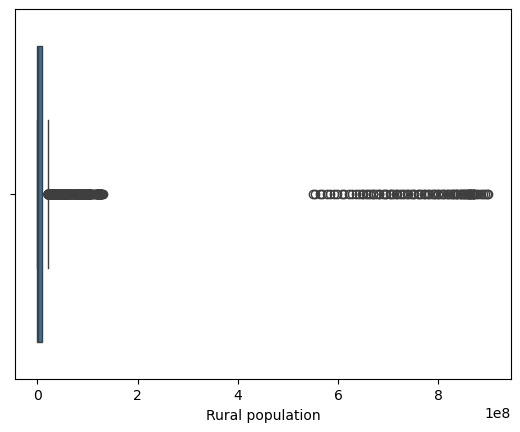

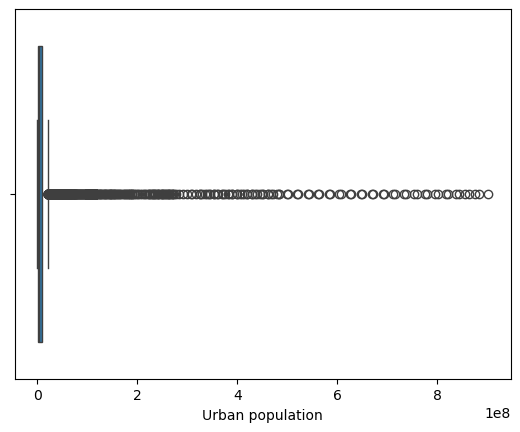

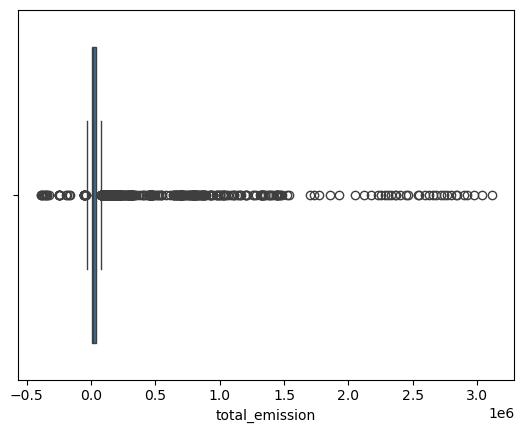

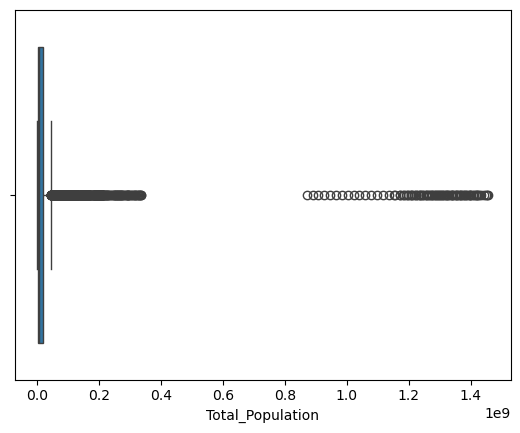

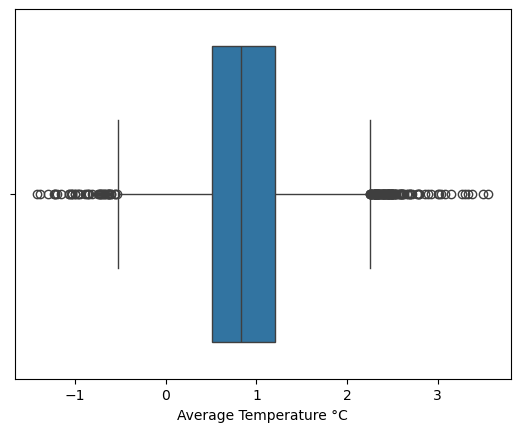

In [36]:
#boxplot to identify outliers

import warnings
warnings.filterwarnings("ignore")

for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [37]:
'''
from sklearn.model_selection import train_test_split

x=df_encoded.drop(columns=['Average Temperature °C'])
y=df_encoded['Average Temperature °C']
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=0)
print(train_x)
print(train_x.columns.tolist())
'''

"\nfrom sklearn.model_selection import train_test_split\n\nx=df_encoded.drop(columns=['Average Temperature °C'])\ny=df_encoded['Average Temperature °C']\ntrain_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=0)\nprint(train_x)\nprint(train_x.columns.tolist())\n"

In [38]:
'''
# scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(train_x)
x_test_scaled=scaler.transform(test_x)
'''

'\n# scaling the data\nfrom sklearn.preprocessing import StandardScaler\nscaler = StandardScaler()\n\nx_train_scaled = scaler.fit_transform(train_x)\nx_test_scaled=scaler.transform(test_x)\n'